<a href="https://colab.research.google.com/github/xzh3113/Clustering/blob/main/Code_0916.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Data Import

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
df_TGF_both = pd.read_csv('/content/drive/MyDrive/Supplementary data/Code_python/Import/Original.csv') # Gaussian_1.csv
DM_manual = pd.read_csv('/content/drive/MyDrive/Supplementary data/Code_python/DM_munual/DM_manual.csv') # DM_manual_Gus1.csv

Mounted at /content/drive


In [ ]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 4.7 MB/s 
     |████████████████████████████████| 1.1 MB 46.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=4a546e975f7ffcb0c34634a1ee6fb93f4c6fd42e5aca514d8e0e0505226394ee
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=b0f8e96cbb15eb72d2f9a14f8a5b523d359520d382cd0ec35cbc456a697990c6
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


# 2.Preprocess

### 2.1 Distance Calculation

In [ ]:
classinformation = df_TGF_both['TGF'].unique()
for temp in classinformation:
   temp_data = df_TGF_both[df_TGF_both['TGF'].isin([temp])]
   exec('df_TGF%s = temp_data'%temp)
df_TGFp = df_TGFP
df_TGFm = df_TGFN.reset_index(drop=True)

In [ ]:
import numpy as np
import math

#### for TGF-
df_TGFm1 = df_TGFm.set_index(['Track n','Slice n'])
Track_h1 = []
Track_h2 = []
Slice_h1 = []
dis_p = []
for i in range(6,94):
  for n in range(1,98):
    x_dt1 = df_TGFm1.loc[(i,n),'X']
    y_dt1 = df_TGFm1.loc[(i,n),'Y']
    for a in range(6,94):
      if a > i:
        x_dt2 = df_TGFm1.loc[(a,n),'X']
        y_dt2 = df_TGFm1.loc[(a,n),'Y']       
        dis = math.sqrt((x_dt1-x_dt2)**2 + (y_dt1-y_dt2)**2)
        if dis < 10:
          dis_p1 = [dis] 
          disx1 = pd.DataFrame([dis_p1])
          disx2 = disx1.apply(int, axis=1)
          dis_p.append(disx2)
          Track_h1.append([i])
          Slice_h1.append([n])
          Track_h2.append([a])
list_p = pd.DataFrame({'Track_h1': np.ravel(Track_h1),'Track_h2': np.ravel(Track_h2),
             'Slice_h1': np.ravel(Slice_h1),'Distance': np.ravel(dis_p)})
list_p1 = list_p.sort_values(by = ['Track_h1','Track_h2'],ascending=True).reset_index(drop=True)
list_p1.to_csv('DM(-)_initial.csv')

#### for TGF+
df_TGFp1 = df_TGFp.set_index(['Track n','Slice n'])
Track_k1 = []
Track_k2 = []
Slice_k1 = []
dis_pr = []
for i in range(1,6):
  for n in range(1,98):
    x_dt1r = df_TGFp1.loc[(i,n),'X']
    y_dt1r = df_TGFp1.loc[(i,n),'Y']
    for a in range(1,6):
      if a > i:
        x_dt2r = df_TGFp1.loc[(a,n),'X']
        y_dt2r = df_TGFp1.loc[(a,n),'Y']       
        disr = math.sqrt((x_dt1r-x_dt2r)**2 + (y_dt1r-y_dt2r)**2)
        if disr < 10:
          dis_p1r = [disr] 
          disx1r = pd.DataFrame([dis_p1r])
          disx2r = disx1r.apply(int, axis=1)
          dis_pr.append(disx2r)
          Track_k1.append([i])
          Slice_k1.append([n])
          Track_k2.append([a])
list_pr = pd.DataFrame({'Track_k1': np.ravel(Track_k1),'Track_k2': np.ravel(Track_k2),
             'Slice_k1': np.ravel(Slice_k1),'Distance': np.ravel(dis_pr)})
list_p1r = list_pr.sort_values(by = ['Track_k1','Track_k2'],ascending=True).reset_index(drop=True)
list_p1r.to_csv('DM(+)_initial.csv')


*   NOTE：The columns **Track_h1** and **Track_h2** in DM(-/+)_initial represent different cells, their **Distance** at **Slice_h1** are calculated. For example, the distance between cells 6 and 7 is always less than 10 before slice86, which is manually entered into line 5 of DM_manual.

### 2.2 Unification

Unify the coordinates of mother to daughter before cell division.

In [ ]:
import copy 
df_TGFb1 = df_TGF_both.set_index(['Track n','Slice n']) 
df_TGFb2 = copy.deepcopy(df_TGFb1)
m = DM_manual['Track_mo'].values
n = DM_manual['Track_dt'].values
s = DM_manual['Slice'].values
for m,n,s in zip(m,n,s): 
    for i in range(1,s+1):
      X_mo = df_TGFb2.loc[(m,i),'X']
      Y_mo = df_TGFb2.loc[(m,i),'Y']
      df_TGFb2['X'].loc[(n,i)] = X_mo
      df_TGFb2['Y'].loc[(n,i)] = Y_mo
df_TGFb3 = df_TGFb2.reset_index()
df_Bo_Uni = df_TGFb3.reset_index(drop=True) 
df_Bo_Uni.to_csv('Both_Uni.csv') 
df_Bo_Uni

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Track n,Slice n,X,Y,TGF
0,1,1,775,343,P
1,1,2,778,334,P
2,1,3,779,327,P
3,1,4,779,327,P
4,1,5,779,321,P
...,...,...,...,...,...
9016,93,93,787,782,N
9017,93,94,790,770,N
9018,93,95,791,771,N
9019,93,96,789,779,N


## 2.3 Normalization

*   First set observation window here. 
*   At each observation period, all cell trajectories are translated so that their starting points are located at the origin (0, 0)

In [ ]:
ob_win = 12   #### Set observation window here ####

cell_index_b1 = df_Bo_Uni['Track n'].unique()
x_list_b1=[]
y_list_b1=[]
x_list_b2=[]
y_list_b2=[]

for name in df_Bo_Uni['Track n'].unique():
    X_list1 = df_Bo_Uni[df_Bo_Uni['Track n'] == name]["X"].values 
    Y_list1 = df_Bo_Uni[df_Bo_Uni['Track n'] == name]["Y"].values 
    for a in df_Bo_Uni['Slice n'].unique(): 
      if a % ob_win == 0:
        initial_X1 = X_list1[a-ob_win]
        initial_Y1 = Y_list1[a-ob_win]
        x_list_b1[a-ob_win:a] = X_list1[a-ob_win:a] - initial_X1
        y_list_b1[a-ob_win:a] = Y_list1[a-ob_win:a] - initial_Y1
        if a + ob_win > 97:
          initial_X1 = X_list1[96]
          initial_Y1 = Y_list1[96]
          x_list_b1[a:97] = X_list1[a:97] - initial_X1
          y_list_b1[a:97] = Y_list1[a:97] - initial_Y1
          break
    x_list_b2.extend(x_list_b1)
    y_list_b2.extend(y_list_b1)
df_relative1 = pd.DataFrame({'X relative': np.ravel(x_list_b2),'Y relative': np.ravel(y_list_b2)})
df_Bo_Uni_Re = pd.concat([df_Bo_Uni, df_relative1], axis=1)
df_Bo_Uni_Re.to_csv('Both_Uni_Relative.csv')
df_Bo_Uni_Re

,Track n,Slice n,X,Y,TGF,X relative,Y relative
0,1,1,775,343,P,0,0
1,1,2,778,334,P,3,-9
2,1,3,779,327,P,4,-16
3,1,4,779,327,P,4,-16
4,1,5,779,321,P,4,-22
...,...,...,...,...,...,...,...
9016,93,93,787,782,N,-1,12
9017,93,94,790,770,N,2,0
9018,93,95,791,771,N,3,1
9019,93,96,789,779,N,1,9


In [ ]:
from matplotlib.pyplot import MultipleLocator
import matplotlib.pyplot as plt
def plotting(df_TGFm, df_TGFp, X_column, Y_column, cluster_pred, change_0, change_1, change_2, change_3, change_4):
    cell_index_m = df_TGFm['Track n'].unique()
    x_list_m = [[] for i in range(len(cell_index_m))]
    y_list_m = [[] for i in range(len(cell_index_m))]
    for i, name in enumerate(cell_index_m):
        x_list_m[i] = df_TGFm[df_TGFm['Track n'] == name][X_column].values
        y_list_m[i] = df_TGFm[df_TGFm['Track n'] == name][Y_column].values
    if df_TGFp is not False:
      cell_index_p = df_TGFp['Track n'].unique()
      x_list_p = [[] for i in range(len(cell_index_p))]
      y_list_p = [[] for i in range(len(cell_index_p))]
      for i, name in enumerate(cell_index_p):
        x_list_p[i] = df_TGFp[df_TGFp['Track n'] == name][X_column].values
        y_list_p[i] = df_TGFp[df_TGFp['Track n'] == name][Y_column].values

    # change color order, if needed.
    if cluster_pred is not False:
      for i, n in enumerate(cluster_pred):
        if n == 0:
          cluster_pred[i] = 5
        if n == 1:
          cluster_pred[i] = 6
        if n == 2:
          cluster_pred[i] = 7
        if n == 3:
          cluster_pred[i] = 8
        if n == 4:
          cluster_pred[i] = 9
      for j, m in enumerate(cluster_pred):
        if m == 5:
          cluster_pred[j] = change_0
        if m == 6:
          cluster_pred[j] = change_1
        if m == 7:
          cluster_pred[j] = change_2
        if m == 8:
          cluster_pred[j] = change_3
        if m == 9:
          cluster_pred[j] = change_4

    # figure
    if X_column=='X' and Y_column=='Y':
      fig,ax = plt.subplots(figsize=(3.5,6))
      ax.set_xlim([700,885])
      ax.set_ylim([0,950])
      ax.xaxis.set_major_locator(MultipleLocator(80))
      ax.yaxis.set_major_locator(MultipleLocator(200))
    if X_column=='X relative' and Y_column=='Y relative':
      fig,ax = plt.subplots(figsize=(4,4))
      ax.set_xlim([-30,35])
      ax.set_ylim([-85,80])
      ax.xaxis.set_major_locator(MultipleLocator(20))
      ax.yaxis.set_major_locator(MultipleLocator(40))
    colors = ["dodgerblue","lawngreen","orangered","darkviolet","orange"]
    if  cluster_pred is not False:
      for i, color in enumerate(cluster_pred):
        ax.scatter(x_list_m[i], y_list_m[i], color=colors[color], linestyle='solid', alpha=0.7, s=10)
        ax.plot(x_list_m[i], y_list_m[i], color=colors[color], linestyle='solid', alpha=0.7)
    if cluster_pred is False:
      for i, color in enumerate(df_TGFm['Track n'].unique()):
        ax.scatter(x_list_m[i], y_list_m[i],color="dodgerblue", linestyle='solid', alpha=0.7, s=10)
        ax.plot(x_list_m[i], y_list_m[i],color="dodgerblue", linestyle='solid', alpha=0.7)
    if df_TGFp is not False:
      for i in range(len(cell_index_p)):
        ax.scatter(x_list_p[i], y_list_p[i], color='black', linestyle='solid',alpha=0.7, s=10)
    fig.tight_layout()
    return

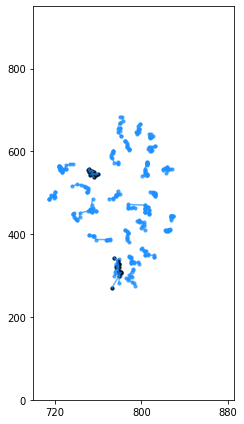

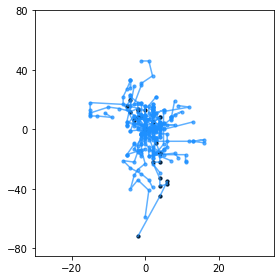

↑↑↑↑ 1 - 12 ↑↑↑↑


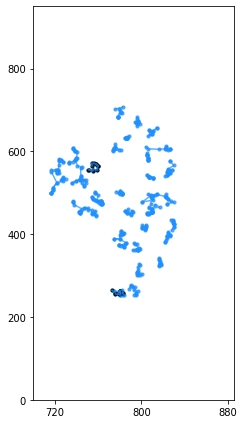

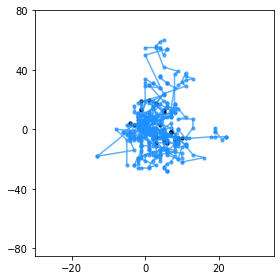

↑↑↑↑ 13 - 24 ↑↑↑↑


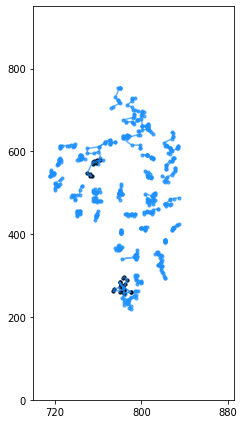

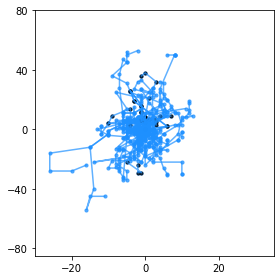

↑↑↑↑ 25 - 36 ↑↑↑↑


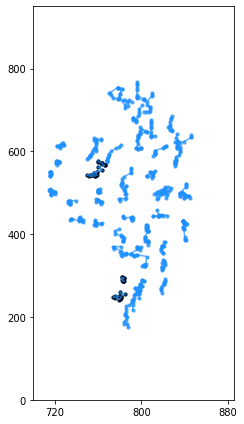

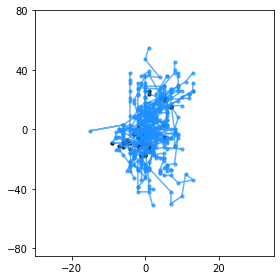

↑↑↑↑ 37 - 48 ↑↑↑↑


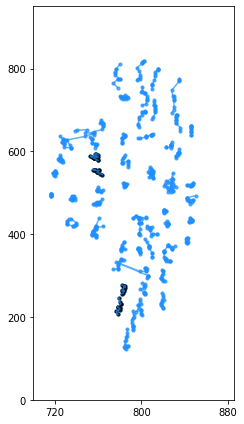

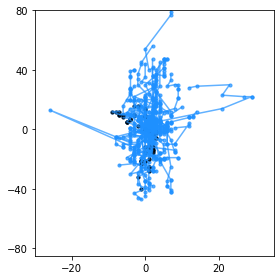

↑↑↑↑ 49 - 60 ↑↑↑↑


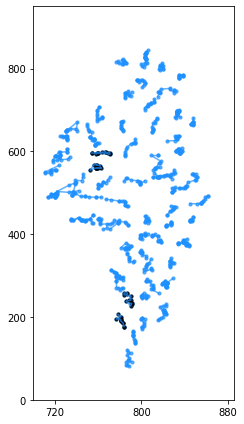

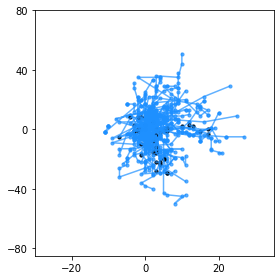

↑↑↑↑ 61 - 72 ↑↑↑↑


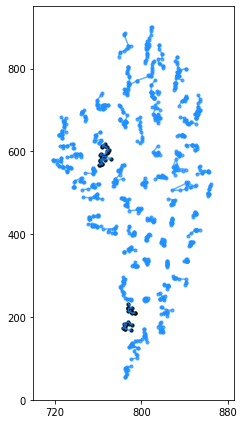

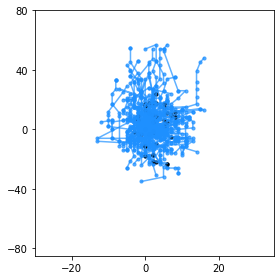

↑↑↑↑ 73 - 84 ↑↑↑↑


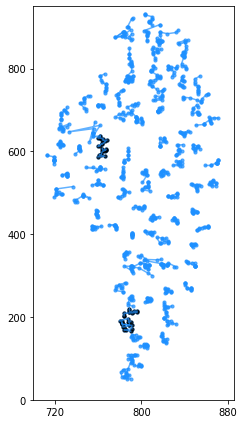

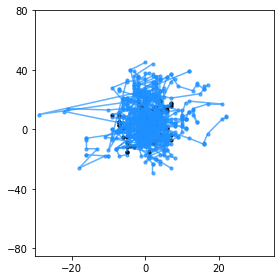

↑↑↑↑ 85 - 96 ↑↑↑↑


In [ ]:
Start_slice=[]
End_slice=[]
for start_slice, end_slice in zip(range(1,97,12),range(12,98,12)):
    Bo_Uni_Re = copy.deepcopy(df_Bo_Uni_Re)
    for i in range(1,start_slice): 
      Bo_Uni_Re = Bo_Uni_Re[(-Bo_Uni_Re['Slice n'].isin([i]))]
    for a in range(end_slice+1, 98): 
      Bo_Uni_Re = Bo_Uni_Re[(-Bo_Uni_Re['Slice n'].isin([a]))]
    for b in DM_manual['Slice'].values: 
      track_del1 = DM_manual.loc[DM_manual['Slice']==b]['Track_dt'].unique()
      if end_slice <= b:
        for n in track_del1:
          Bo_Uni_Re = Bo_Uni_Re[(-Bo_Uni_Re['Track n'].isin([n]))]
    data_2=[]
    data_3=[]
    for num in Bo_Uni_Re['Track n'].unique():
      data_2 = np.array(Bo_Uni_Re[Bo_Uni_Re['Track n']==num][["X relative","Y relative"]])
      data_3.append([token for st in data_2 for token in st]) 
      Start_slice.extend([start_slice])
      End_slice.extend([end_slice])
    data_ori = np.array(data_3)
    data_name = Bo_Uni_Re['Track n'].unique()
    Uni_Re_2_P = Bo_Uni_Re[Bo_Uni_Re['TGF'].isin(['P'])]
    Uni_Re_2_N = Bo_Uni_Re[Bo_Uni_Re['TGF'].isin(['N'])]
    plotting(Bo_Uni_Re, Uni_Re_2_P, "X", "Y", False, 0, 0, 0, 0, 0)
    plotting(Bo_Uni_Re, Uni_Re_2_P, "X relative", "Y relative", False, 0, 0, 0, 0, 0) # normalized without clustering
    plt.show()
    print('↑↑↑↑',start_slice,'-', end_slice,'↑↑↑↑')

# 3 Clustering

1.   Set start and end slice of period
2.   Calculate Distance Matrix
3.   Dimension reduction
4.   Cluster number, WCSS (within-cluster sum of squares of distance), MSC (mean Silhouette coefficient)
5.   k-means clustering





In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from math import sqrt
import matplotlib.colors
import umap

##  3.1 Number of Clusters

In [ ]:
def WCSS(start_slice, end_slice): 
    Bo_Uni_Re = copy.deepcopy(df_Bo_Uni_Re)   
    for i in range(1,start_slice):
      Bo_Uni_Re = Bo_Uni_Re[(-Bo_Uni_Re['Slice n'].isin([i]))]
    for a in range(end_slice+1, 98):
      Bo_Uni_Re = Bo_Uni_Re[(-Bo_Uni_Re['Slice n'].isin([a]))]
    for b in DM_manual['Slice'].values:
      track_del1 = DM_manual.loc[DM_manual['Slice']==b]['Track_dt'].unique()
      if end_slice <= b:
        for n in track_del1:
          Bo_Uni_Re = Bo_Uni_Re[(-Bo_Uni_Re['Track n'].isin([n]))]
    data_2=[]
    data_3=[]
    for num in Bo_Uni_Re['Track n'].unique():
        data_2 = np.array(Bo_Uni_Re[Bo_Uni_Re['Track n']==num][["X relative","Y relative"]])
        data_3.append([token for st in data_2 for token in st])       
    data_ori = np.array(data_3)
    data_name = Bo_Uni_Re['Track n'].unique()
   
    # 1. Euclidean distance
    Bo_Uni_Re1 = copy.deepcopy(Bo_Uni_Re)
    orig = Bo_Uni_Re1.set_index(['Track n','Slice n'])
    eu_dis = [] 
    for i,j in enumerate(Bo_Uni_Re1['Track n'].unique()): 
      if j == Bo_Uni_Re1['Track n'].unique()[-1]:
        break
      for d in range (1,j+1):
        Bo_Uni_Re1 = Bo_Uni_Re1[(-Bo_Uni_Re1['Track n'].isin([d]))]
      for m in Bo_Uni_Re1['Track n'].unique():
        euclid1 = 0
        for n in range(start_slice,end_slice+1): 
          x_e1 = orig.loc[(j,n),'X relative']
          y_e1 = orig.loc[(j,n),'Y relative']
          x_e2 = orig.loc[(m,n),'X relative']
          y_e2 = orig.loc[(m,n),'Y relative']
          euclid = sqrt((x_e1-x_e2)**2+(y_e1-y_e2)**2)
          euclid1 = euclid1 + euclid
        eu_dis.append(euclid1)

    # 2. Symmetric matrix
    k = len(eu_dis)
    n_matrix = int((1+int((1+8*k)**0.5))/2)
    half_matrix = np.zeros((n_matrix,n_matrix))
    start_index = 0
    for row in range(n_matrix-1):
      end_index = start_index+(n_matrix-1-row)
      half_matrix[row,row+1:] = eu_dis[start_index:end_index]
      start_index = end_index
    symme_matrix = half_matrix + half_matrix.T   

    ## UMAP
    reducer = umap.UMAP(random_state=1, n_neighbors=5, min_dist=0.001)
    embedding = reducer.fit_transform(symme_matrix) 

    ## K-means   
    WCSS = []
    Scores = []  # silhouette_score
    for k in range(2,9):
      estimator = KMeans(n_clusters = k, random_state = 1).fit(embedding)
      WCSS.append(estimator.inertia_)
      Scores.append(silhouette_score(embedding,estimator.labels_,metric='euclidean'))
    X = range(2,9)
    WCSS_2f = [float('{:.1f}'.format(i)) for i in WCSS]

    fig, ax1 = plt.subplots(1, 1, figsize=(5,4))
    ax2 = ax1.twinx()
    ax1.plot(X, WCSS, 'o-', linewidth=3)
    ax2.plot(X, Scores, 'o-', color='coral', linewidth=3)
    ax1.set_xlabel('Number of clusters (k)',fontsize=15)
    ax1.set_ylabel('WCSS',fontsize=15)
    ax2.set_ylabel('MSC', fontsize=15)
    ax1.set_ylim(-200,3500) 
    ax2.set_ylim(0,1) 
    plt.show()
    print('↑↑↑↑',start_slice,'-', end_slice,'↑↑↑↑')

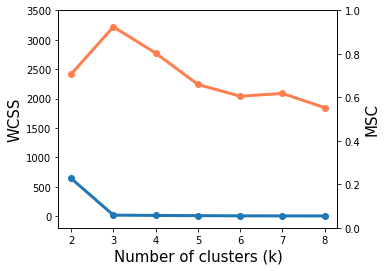

↑↑↑↑ 1 - 12 ↑↑↑↑


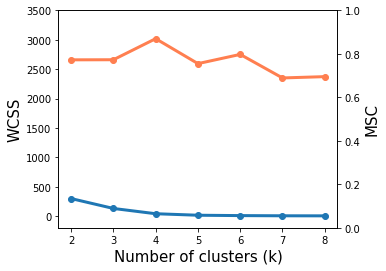

↑↑↑↑ 13 - 24 ↑↑↑↑


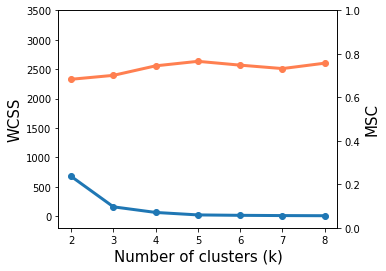

↑↑↑↑ 25 - 36 ↑↑↑↑


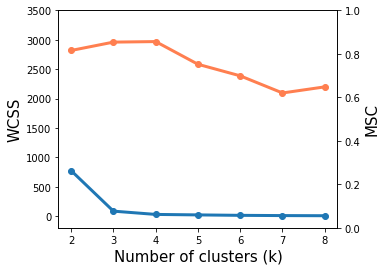

↑↑↑↑ 37 - 48 ↑↑↑↑


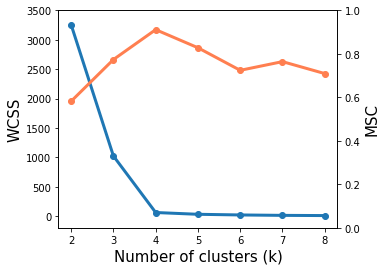

↑↑↑↑ 49 - 60 ↑↑↑↑


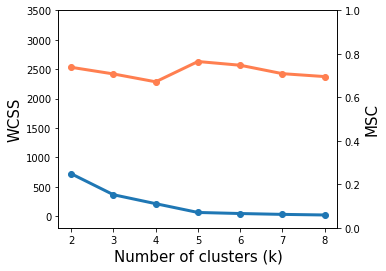

↑↑↑↑ 61 - 72 ↑↑↑↑


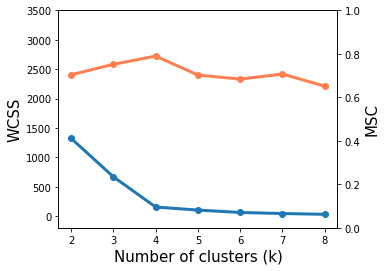

↑↑↑↑ 73 - 84 ↑↑↑↑


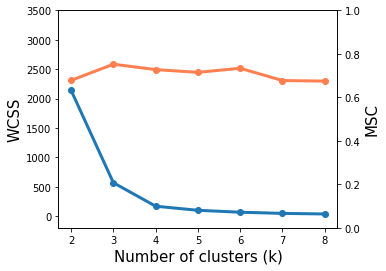

↑↑↑↑ 85 - 96 ↑↑↑↑


In [ ]:
for a, b in zip(range(1,97,12),range(12,98,12)):
  WCSS(a,b)

## 3.2 Dimension Reduction and Clustering

The k under the maximum MSC was selected. k needs to be entered manually below.

In [ ]:
def period(start_slice, end_slice, leader_number, cluster):
    Bo_Uni_Re = copy.deepcopy(df_Bo_Uni_Re)
    for i in range(1,start_slice):
      Bo_Uni_Re = Bo_Uni_Re[(-Bo_Uni_Re['Slice n'].isin([i]))]
    for a in range(end_slice+1, 98):
      Bo_Uni_Re = Bo_Uni_Re[(-Bo_Uni_Re['Slice n'].isin([a]))]
    for b in DM_manual['Slice'].values:
      track_del1 = DM_manual.loc[DM_manual['Slice']==b]['Track_dt'].unique()
      if end_slice <= b:
        for n in track_del1:
          Bo_Uni_Re = Bo_Uni_Re[(-Bo_Uni_Re['Track n'].isin([n]))]
    data_2=[]
    data_3=[]
    for num in Bo_Uni_Re['Track n'].unique():
        data_2 = np.array(Bo_Uni_Re[Bo_Uni_Re['Track n']==num][["X relative","Y relative"]])
        data_3.append([token for st in data_2 for token in st])
    data_ori = np.array(data_3)
    data_name = Bo_Uni_Re['Track n'].unique()

    # 1. Euclidean distance
    Bo_Uni_Re1 = copy.deepcopy(Bo_Uni_Re)
    orig = Bo_Uni_Re1.set_index(['Track n','Slice n'])
    eu_dis = [] 
    for i,j in enumerate(Bo_Uni_Re1['Track n'].unique()): 
      if j == Bo_Uni_Re1['Track n'].unique()[-1]:
        break
      for d in range (1,j+1):
        Bo_Uni_Re1 = Bo_Uni_Re1[(-Bo_Uni_Re1['Track n'].isin([d]))]
      for m in Bo_Uni_Re1['Track n'].unique():
        euclid1 = 0
        for n in range(start_slice,end_slice+1):
          x_e1 = orig.loc[(j,n),'X relative']
          y_e1 = orig.loc[(j,n),'Y relative']
          x_e2 = orig.loc[(m,n),'X relative']
          y_e2 = orig.loc[(m,n),'Y relative']
          euclid = sqrt((x_e1-x_e2)**2+(y_e1-y_e2)**2)
          euclid1 = euclid1 + euclid
        eu_dis.append(euclid1)

    # 2. Symmetric matrix
    k = len(eu_dis)
    n_matrix = int((1+int((1+8*k)**0.5))/2)
    half_matrix = np.zeros((n_matrix,n_matrix))
    start_index = 0
    for row in range(n_matrix-1):
      end_index = start_index+(n_matrix-1-row)
      half_matrix[row,row+1:] = eu_dis[start_index:end_index]
      start_index = end_index
    symme_matrix = half_matrix + half_matrix.T   

    ## umap
    reducer = umap.UMAP(random_state=1, n_neighbors=5, min_dist=0.001)
    embedding = reducer.fit_transform(symme_matrix)
    
    ## kmeans
    cluster_pred = KMeans(n_clusters=cluster, random_state=1).fit_predict(embedding)
    n=leader_number
    plt.figure(figsize=(6,6))
    plt.xlim(-11,23)
    plt.ylim(-13,18)
    plt.scatter(embedding[n:94, 0], embedding[n:94, 1], c=cluster_pred[n:], cmap = matplotlib.colors.ListedColormap(["indianred","purple","cornflowerblue","limegreen","orange"]), alpha=0.4, s=20)
    if n == 5: 
      plt.scatter(embedding[0:3,0],embedding[0:3,1],c=cluster_pred[0:3],cmap=matplotlib.colors.ListedColormap(["r"]),marker='X',edgecolors='yellow',alpha=1, s=100)
      plt.scatter(embedding[3:n,0],embedding[3:n,1],c=cluster_pred[3:n],cmap=matplotlib.colors.ListedColormap(["b"]),marker='X',edgecolors='cyan',alpha=1, s=100)
    if n == 4:
      plt.scatter(embedding[0:2,0],embedding[0:2,1],c=cluster_pred[0:2],cmap=matplotlib.colors.ListedColormap(["r"]),marker='X',edgecolors='yellow',alpha=1, s=100)
      plt.scatter(embedding[2:n,0],embedding[2:n,1],c=cluster_pred[2:n],cmap=matplotlib.colors.ListedColormap(["b"]),marker='X',edgecolors='cyan',alpha=1, s=100)
    if n == 3:
      plt.scatter(embedding[0:2,0],embedding[0:2,1],c=cluster_pred[0:2],cmap=matplotlib.colors.ListedColormap(["r"]),marker='X',edgecolors='yellow',alpha=1, s=100)
      plt.scatter(embedding[2:n,0],embedding[2:n,1],c=cluster_pred[2:n],cmap=matplotlib.colors.ListedColormap(["b"]),marker='X',edgecolors='cyan',alpha=1, s=100)
    if n == 2:
      plt.scatter(embedding[0:1,0],embedding[0:1,1],c=cluster_pred[0:1],cmap=matplotlib.colors.ListedColormap(["r"]),marker='X',edgecolors='yellow',alpha=1, s=100)
      plt.scatter(embedding[1:n,0],embedding[1:n,1],c=cluster_pred[1:n],cmap=matplotlib.colors.ListedColormap(["b"]),marker='X',edgecolors='cyan',alpha=1, s=100)
    plt.show()
    print('↑↑↑↑',start_slice,'-', end_slice,'↑↑↑↑')
    print('Cell ID:',data_name)
    print('Cluster ID:',cluster_pred)
    return data_name

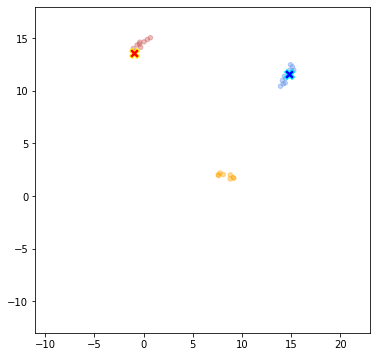

↑↑↑↑ 1 - 12 ↑↑↑↑
Cell ID: [ 3  4  6  8  9 10 13 14 25 26 27 33 34 36 37 39 45 46 50 53 56 59 67 69
 78 80 83 87 89 90]
Cluster ID: [0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 2 2 2 2 1 1 1 2 1 2 1 1 1 2 2]


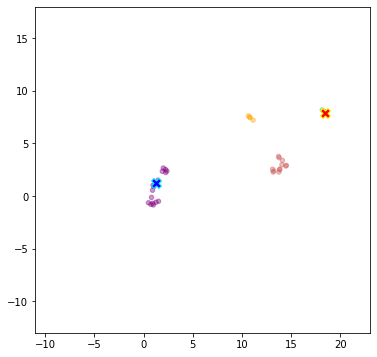

↑↑↑↑ 13 - 24 ↑↑↑↑
Cell ID: [ 3  4  6  8  9 10 13 14 19 25 26 27 29 30 33 34 36 37 39 40 41 43 45 46
 50 53 54 56 59 60 67 69 78 80 83 87 89 90]
Cluster ID: [2 1 0 2 0 0 0 0 1 1 3 0 0 3 1 1 2 2 0 0 1 1 1 3 1 1 1 1 0 1 1 1 2 1 3 1 0
 0]


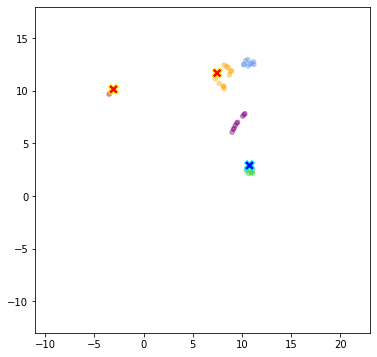

↑↑↑↑ 25 - 36 ↑↑↑↑
Cell ID: [ 1  3  4  6  8  9 10 13 14 17 19 25 26 27 29 30 33 34 36 37 39 40 41 43
 45 46 50 53 54 56 57 58 59 60 67 69 71 72 75 78 80 83 85 87 89 90]
Cluster ID: [4 0 3 3 4 1 3 3 1 0 1 1 1 2 2 4 3 3 2 2 0 4 1 2 4 4 1 2 2 3 3 4 4 4 2 4 4
 0 0 1 0 3 4 1 4 2]


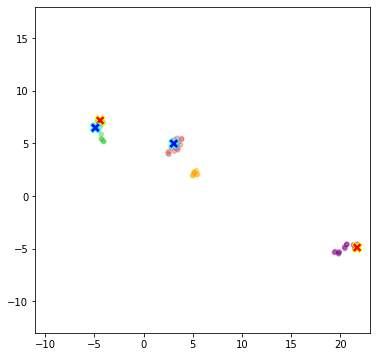

↑↑↑↑ 37 - 48 ↑↑↑↑
Cell ID: [ 1  3  4  5  6  8  9 10 13 14 15 17 19 20 23 25 26 27 29 30 33 34 36 37
 39 40 41 43 45 46 48 50 53 54 56 57 58 59 60 67 69 71 72 75 78 80 82 83
 85 87 89 90 91]
Cluster ID: [1 2 2 0 1 1 1 1 1 1 2 1 1 3 1 3 2 2 2 1 2 2 2 0 0 2 3 2 0 3 0 3 2 0 0 0 0
 0 0 0 3 0 0 3 2 1 1 3 2 0 2 1 1]


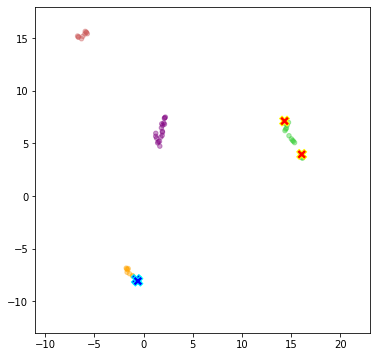

↑↑↑↑ 49 - 60 ↑↑↑↑
Cell ID: [ 1  3  4  5  6  8  9 10 13 14 15 17 19 20 23 25 26 27 28 29 30 31 33 34
 36 37 38 39 40 41 43 45 46 48 50 53 54 55 56 57 58 59 60 67 69 71 72 75
 77 78 80 82 83 85 87 89 90 91 92]
Cluster ID: [2 2 3 3 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 1 1 1 1 3 2 1 1 3 3 1 1 1 3
 0 0 3 3 3 0 0 0 0 0 0 1 3 0 1 1 0 1 1 3 1 2]


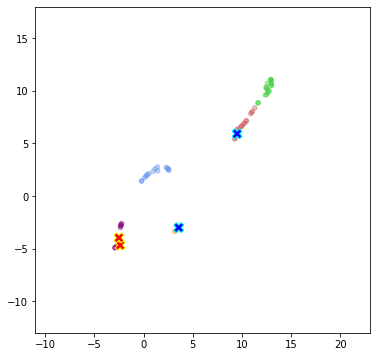

↑↑↑↑ 61 - 72 ↑↑↑↑
Cell ID: [ 1  3  4  5  6  8  9 10 12 13 14 15 16 17 18 19 20 21 23 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48 50 51 53 54 55 56
 57 58 59 60 62 64 67 69 71 72 75 76 77 78 80 82 83 85 87 89 90 91 92]
Cluster ID: [1 1 0 4 1 1 1 1 0 1 1 2 1 2 2 1 2 0 1 1 0 3 1 4 0 2 4 4 0 0 4 4 0 0 3 2 3
 3 3 2 2 3 2 0 2 1 2 3 3 3 0 2 3 0 3 3 0 2 1 0 0 3 0 2 3 3 3 0 0 2 2]


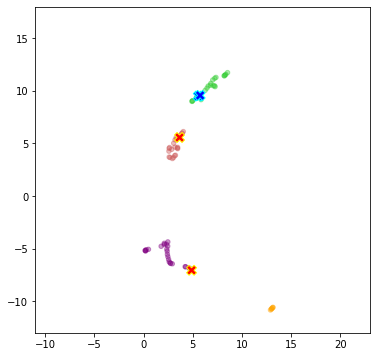

↑↑↑↑ 73 - 84 ↑↑↑↑
Cell ID: [ 1  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 62 63 64 65 66 67 69 70 71 72 73 75 76 77 78 80 81
 82 83 85 86 87 88 89 90 91 92]
Cluster ID: [0 1 2 2 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 2 0 0 1 1 0 2 0 2 0 2 1
 0 1 2 0 1 0 2 0 0 2 2 2 2 1 0 3 1 1 2 2 2 2 2 2 2 3 2 3 2 3 3 0 0 3 1 0 2
 2 0 0 2 2 2 0 0]


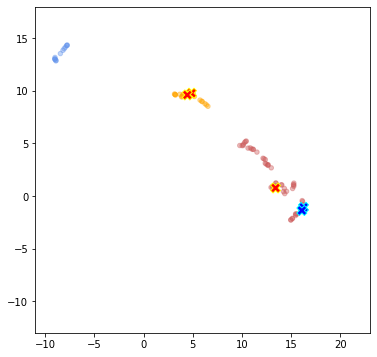

↑↑↑↑ 85 - 96 ↑↑↑↑
Cell ID: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 80 81 82 83 84 85 86 87 88 89 90 91 92 93]
Cluster ID: [2 0 2 0 0 0 1 0 0 2 0 2 2 0 2 0 2 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 2 2 0 0 0
 0 2 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 1 1 2 1 1 0 0 0 1 1 0 1 0
 1 0 0 0 0 0 0 0 2 1 0 0 1 0 0 2 2 0]


In [ ]:
for a, b, c, d in zip(range(1,97,12),range(12,98,12),(2,2,3,4,4,4,4,5),(3,4,5,4,4,5,4,3)): #Raw
# for a, b, c, d in zip(range(1,97,12),range(12,98,12),(2,2,3,4,4,4,4,5),(3,4,4,2,4,5,3,3)): #Gaussian 1 
# for a, b, c, d in zip(range(1,97,12),range(12,98,12),(2,2,3,4,4,4,4,5),(3,2,4,3,4,5,4,3)): #Gaussian 1.2
# for a, b, c, d in zip(range(1,97,12),range(12,98,12),(2,2,3,4,4,4,4,5),(3,4,2,5,5,3,4,5)): #Gaussian 1.3
# for a, b, c, d in zip(range(1,97,12),range(12,98,12),(2,2,3,4,4,4,4,5),(2,4,2,3,3,5,5,4)): #Gaussian 2
# for a, b, c, d in zip(range(1,97,12),range(12,98,12),(2,2,3,4,4,4,4,5),(2,2,3,4,5,4,4,3)): #Gaussian 2.2
# for a, b, c, d in zip(range(1,97,12),range(12,98,12),(2,2,3,4,4,4,4,5),(2,2,4,2,5,4,5,4)): #Gaussian 2.3
  period(a,b,c,d)

## 3.5 Clustering Results

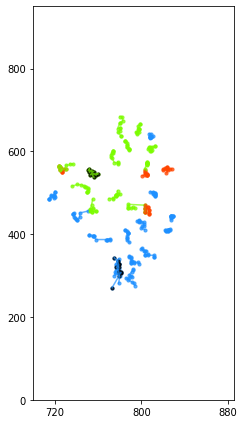

↑↑↑↑ 1 - 12 ↑↑↑↑
Cell ID: [ 3  4  6  8  9 10 13 14 25 26 27 33 34 36 37 39 45 46 50 53 56 59 67 69
 78 80 83 87 89 90]
Cluster ID (after change): [0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 2 2 2 1 1 1 0 1 2 1 1 1 0 0]


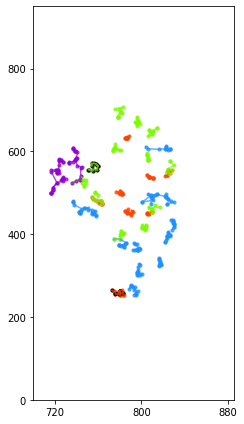

↑↑↑↑ 13 - 24 ↑↑↑↑
Cell ID: [ 3  4  6  8  9 10 13 14 19 25 26 27 29 30 33 34 36 37 39 40 41 43 45 46
 50 53 54 56 59 60 67 69 78 80 83 87 89 90]
Cluster ID (after change): [2 1 0 2 0 0 0 0 1 1 2 0 0 2 1 3 2 2 0 0 3 1 1 2 3 3 3 1 0 1 1 1 2 1 2 1 0
 0]


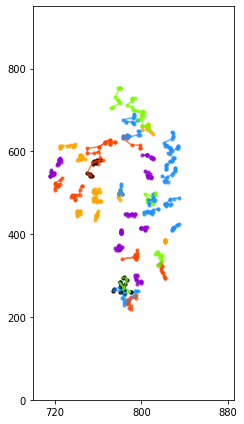

↑↑↑↑ 25 - 36 ↑↑↑↑
Cell ID: [ 1  3  4  6  8  9 10 13 14 17 19 25 26 27 29 30 33 34 36 37 39 40 41 43
 45 46 50 53 54 56 57 58 59 60 67 69 71 72 75 78 80 83 85 87 89 90]
Cluster ID (after change): [0 1 2 2 0 3 2 2 3 1 3 3 3 4 4 0 2 2 4 4 1 0 3 4 0 0 3 4 4 2 2 0 0 0 4 0 0
 1 1 3 1 2 0 3 0 4]


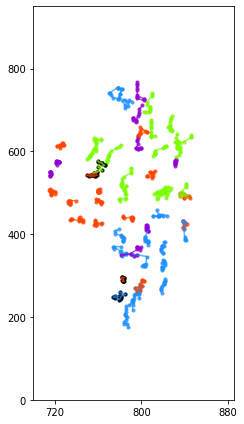

↑↑↑↑ 37 - 48 ↑↑↑↑
Cell ID: [ 1  3  4  5  6  8  9 10 13 14 15 17 19 20 23 25 26 27 29 30 33 34 36 37
 39 40 41 43 45 46 48 50 53 54 56 57 58 59 60 67 69 71 72 75 78 80 82 83
 85 87 89 90 91]
Cluster ID (after change): [0 2 2 1 0 0 0 0 0 0 2 0 0 3 0 3 2 2 2 0 2 2 2 1 1 2 3 2 1 3 1 3 2 1 1 1 1
 1 1 1 3 1 1 3 2 0 0 3 2 1 2 0 0]


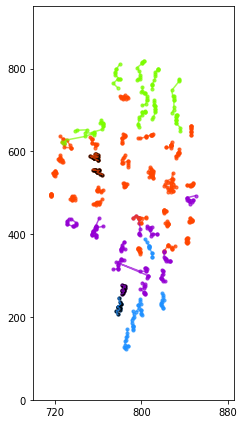

↑↑↑↑ 49 - 60 ↑↑↑↑
Cell ID: [ 1  3  4  5  6  8  9 10 13 14 15 17 19 20 23 25 26 27 28 29 30 31 33 34
 36 37 38 39 40 41 43 45 46 48 50 53 54 55 56 57 58 59 60 67 69 71 72 75
 77 78 80 82 83 85 87 89 90 91 92]
Cluster ID (after change): [0 3 2 2 0 0 0 0 3 3 3 3 3 2 0 3 3 3 3 3 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2
 1 1 2 2 2 1 1 1 1 1 1 2 2 1 2 2 1 2 2 2 2 3]


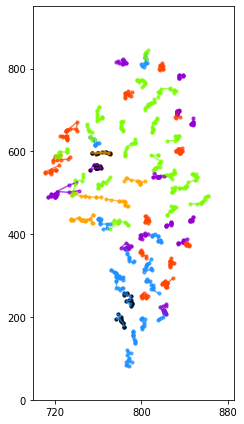

↑↑↑↑ 61 - 72 ↑↑↑↑
Cell ID: [ 1  3  4  5  6  8  9 10 12 13 14 15 16 17 18 19 20 21 23 25 26 27 28 29
 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48 50 51 53 54 55 56
 57 58 59 60 62 64 67 69 71 72 75 76 77 78 80 82 83 85 87 89 90 91 92]
Cluster ID (after change): [0 0 3 4 0 0 0 0 3 0 0 2 0 2 2 0 2 3 0 0 3 1 0 4 3 2 4 4 3 3 4 4 1 1 1 2 1
 1 1 2 2 1 2 1 2 0 2 1 1 1 3 2 1 3 1 1 3 2 0 1 3 1 3 2 1 1 1 3 3 2 2]


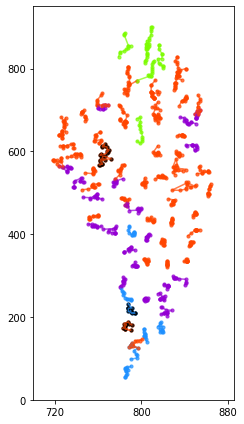

↑↑↑↑ 73 - 84 ↑↑↑↑
Cell ID: [ 1  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 23 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 62 63 64 65 66 67 69 70 71 72 73 75 76 77 78 80 81
 82 83 85 86 87 88 89 90 91 92]
Cluster ID (after change): [2 0 2 2 0 0 0 0 2 3 3 0 3 3 3 3 3 2 3 2 2 3 0 3 3 2 2 2 3 3 2 2 2 2 2 2 3
 2 3 2 2 3 2 2 2 2 2 2 2 2 3 2 1 3 3 2 2 2 2 2 2 2 1 2 1 2 1 1 2 2 1 3 2 2
 2 2 2 2 2 2 2 2]


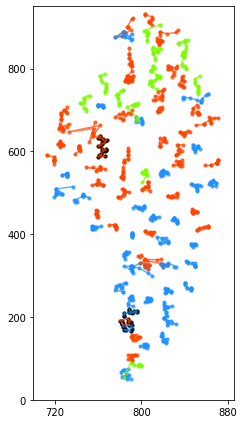

↑↑↑↑ 85 - 96 ↑↑↑↑
Cell ID: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 80 81 82 83 84 85 86 87 88 89 90 91 92 93]
Cluster ID (after change): [0 2 0 2 2 0 1 2 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 2 0 2 0 0 0 2 0 0 2 2 2
 2 0 0 0 2 2 1 2 2 0 2 2 2 2 2 2 2 2 0 2 0 2 2 1 1 1 0 1 1 2 2 2 1 1 2 1 2
 1 2 0 2 2 0 2 2 0 1 2 2 1 2 2 0 0 2]


In [ ]:
Cell_ID=[]
Cluster_ID=[]
Start_slice=[]
End_slice=[]

# Raw:
for start_slice, end_slice, cluster, change_0, change_1, change_2, change_3, change_4 in zip(range(1,97,12),range(12,98,12),(3,4,5,4,4,5,4,3),
    (0, 0, 1, 1, 1, 1, 2, 2), # 0:dodgerblue, 1:lawngreen, 2:orangered, 3:darkviolet, 4:orange (Vertical)
    (1, 1, 0, 0, 2, 0, 3, 0),
    (2, 2, 2, 2, 3, 3, 1, 1),
    (3, 3, 3, 3, 0, 2, 0, 3),
    (4, 4, 4, 4, 4, 4, 4, 4)):
# Gaussian noise 1:
# for start_slice, end_slice, cluster, change_0, change_1, change_2, change_3, change_4 in zip(range(1,97,12),range(12,98,12),(3,4,4,2,4,5,3,3),
#                     (0,0,1,1,1,1,3,2), 
#                     (1,1,2,0,2,0,2,1),
#                     (2,2,4,2,3,3,1,0),
#                     (3,3,0,3,0,2,0,3),
#                     (4,4,3,4,4,4,4,4)):
# Gaussian noise 1.2:
# for start_slice, end_slice, cluster, change_0, change_1, change_2, change_3, change_4 in zip(range(1,97,12),range(12,98,12),(3,2,4,3,4,5,4,3),
#                     (0,0,1,1,1,1,2,0), 
#                     (1,1,2,2,2,0,0,2),
#                     (2,2,4,0,3,3,3,1),
#                     (3,3,0,3,0,2,1,3),
#                     (4,4,3,4,4,4,4,4)):
# Gaussian noise 1.3：
# for start_slice, end_slice, cluster, change_0, change_1, change_2, change_3, change_4 in zip(range(1,97,12),range(12,98,12),(3,4,2,5,5,3,4,5),
#                     (0,0,0,0,1,4,2,2), 
#                     (1,2,3,1,0,1,1,1),
#                     (2,1,4,2,2,0,0,0),
#                     (3,3,1,3,4,2,3,3),
#                     (4,4,2,4,3,3,4,4)):
# Gaussian noise 2：
# for start_slice, end_slice, cluster, change_0, change_1, change_2, change_3, change_4 in zip(range(1,97,12),range(12,98,12),(2,4,2,3,3,5,5,4),
#                     (0,3,1,2,1,1,0,0), 
#                     (1,2,0,1,2,3,2,2),
#                     (2,0,2,0,3,0,3,3),
#                     (3,1,3,3,0,4,1,1),
#                     (4,4,4,4,4,2,4,4)):
# Gaussian noise 2.2：
# for start_slice, end_slice, cluster, change_0, change_1, change_2, change_3, change_4 in zip(range(1,97,12),range(12,98,12),(2,2,3,4,5,4,4,3),
#                     (0,0,1,1,1,1,3,0), 
#                     (1,1,3,0,0,2,1,1),
#                     (2,3,0,3,2,0,0,2),
#                     (3,2,2,2,3,4,2,3),
#                     (4,4,4,4,4,3,4,4)):
# Gaussian noise 2.3：
# for start_slice, end_slice, cluster, change_0, change_1, change_2, change_3, change_4 in zip(range(1,97,12),range(12,98,12),(2,2,4,2,5,4,5,4),
#                     (0,0,1,1,1,1,2,2), 
#                     (1,1,3,0,0,2,3,1),
#                     (2,3,0,3,2,0,0,0),
#                     (3,2,2,2,3,4,1,3),
#                     (4,4,4,4,4,3,4,4)):
  
    Bo_Uni_Re = copy.deepcopy(df_Bo_Uni_Re)
    for i in range(1,start_slice): 
      Bo_Uni_Re = Bo_Uni_Re[(-Bo_Uni_Re['Slice n'].isin([i]))]
    for a in range(end_slice+1, 98): 
      Bo_Uni_Re = Bo_Uni_Re[(-Bo_Uni_Re['Slice n'].isin([a]))]
    for b in DM_manual['Slice'].values: 
      track_del1 = DM_manual.loc[DM_manual['Slice']==b]['Track_dt'].unique()
      if end_slice <= b:
        for n in track_del1:
          Bo_Uni_Re = Bo_Uni_Re[(-Bo_Uni_Re['Track n'].isin([n]))]
    data_2=[]
    data_3=[]
    for num in Bo_Uni_Re['Track n'].unique():
        data_2 = np.array(Bo_Uni_Re[Bo_Uni_Re['Track n']==num][["X relative","Y relative"]])
        data_3.append([token for st in data_2 for token in st]) 
        Start_slice.extend([start_slice])
        End_slice.extend([end_slice])
    data_ori = np.array(data_3)
    data_name = Bo_Uni_Re['Track n'].unique()

    # 1. Eu distance
    Bo_Uni_Re1 = copy.deepcopy(Bo_Uni_Re)
    orig = Bo_Uni_Re1.set_index(['Track n','Slice n'])
    eu_dis = [] 
    for i,j in enumerate(Bo_Uni_Re1['Track n'].unique()): 
      if j == Bo_Uni_Re1['Track n'].unique()[-1]:
        break
      for d in range (1,j+1):
        Bo_Uni_Re1 = Bo_Uni_Re1[(-Bo_Uni_Re1['Track n'].isin([d]))]
      for m in Bo_Uni_Re1['Track n'].unique():
        euclid1 = 0
        for n in range(start_slice,end_slice+1):
          x_e1 = orig.loc[(j,n),'X relative']
          y_e1 = orig.loc[(j,n),'Y relative']
          x_e2 = orig.loc[(m,n),'X relative']
          y_e2 = orig.loc[(m,n),'Y relative']
          euclid = sqrt((x_e1-x_e2)**2+(y_e1-y_e2)**2)
          euclid1 = euclid1 + euclid
        eu_dis.append(euclid1)

    # 2. Symmetric matrix
    k = len(eu_dis)
    n_matrix = int((1+int((1+8*k)**0.5))/2)
    half_matrix = np.zeros((n_matrix,n_matrix))
    start_index = 0
    for row in range(n_matrix-1):
      end_index = start_index+(n_matrix-1-row)
      half_matrix[row,row+1:] = eu_dis[start_index:end_index]
      start_index = end_index
    symme_matrix = half_matrix + half_matrix.T

    ## umap
    reducer = umap.UMAP(random_state=10, n_neighbors=4, min_dist=0.001)
    embedding = reducer.fit_transform(symme_matrix)
    
    ## kmeans
    cluster_pred = KMeans(n_clusters=cluster, random_state=1).fit_predict(embedding)

    Uni_Re_2_P = Bo_Uni_Re[Bo_Uni_Re['TGF'].isin(['P'])]
    Uni_Re_2_N = Bo_Uni_Re[Bo_Uni_Re['TGF'].isin(['N'])]

    ## cluster information combined with positions
    plotting(Bo_Uni_Re, Uni_Re_2_P, "X", "Y", cluster_pred, change_0, change_1, change_2, change_3, change_4) # with clustering
    plt.show()
    track_p2 = Bo_Uni_Re['Track n'].unique()
    print('↑↑↑↑',start_slice,'-', end_slice,'↑↑↑↑')
    print('Cell ID:',track_p2)
    print('Cluster ID (after change):',cluster_pred)
    Cluster_ID.extend(cluster_pred)
    Cell_ID.extend(data_name)
    
df_cluster1 = pd.DataFrame({'Start_slice': np.ravel(Start_slice),
               'End_slice': np.ravel(End_slice),
               'Cluster': np.ravel(Cluster_ID),
               'Cell': np.ravel(Cell_ID),
               'Color': np.ravel(Cluster_ID)})
comap = {0: 'dodgerblue', 1: 'lawngreen', 2: 'orangered', 3: 'darkviolet', 4: 'orange'}
df_cluster1['Color'] = df_cluster1['Color'].map(comap)
df_cluster1.to_csv('lineage_color.csv')

# 4.Cell Lineage

*   If a cell divided before slice 12, then line 50 / 53 / 66 should be modified.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


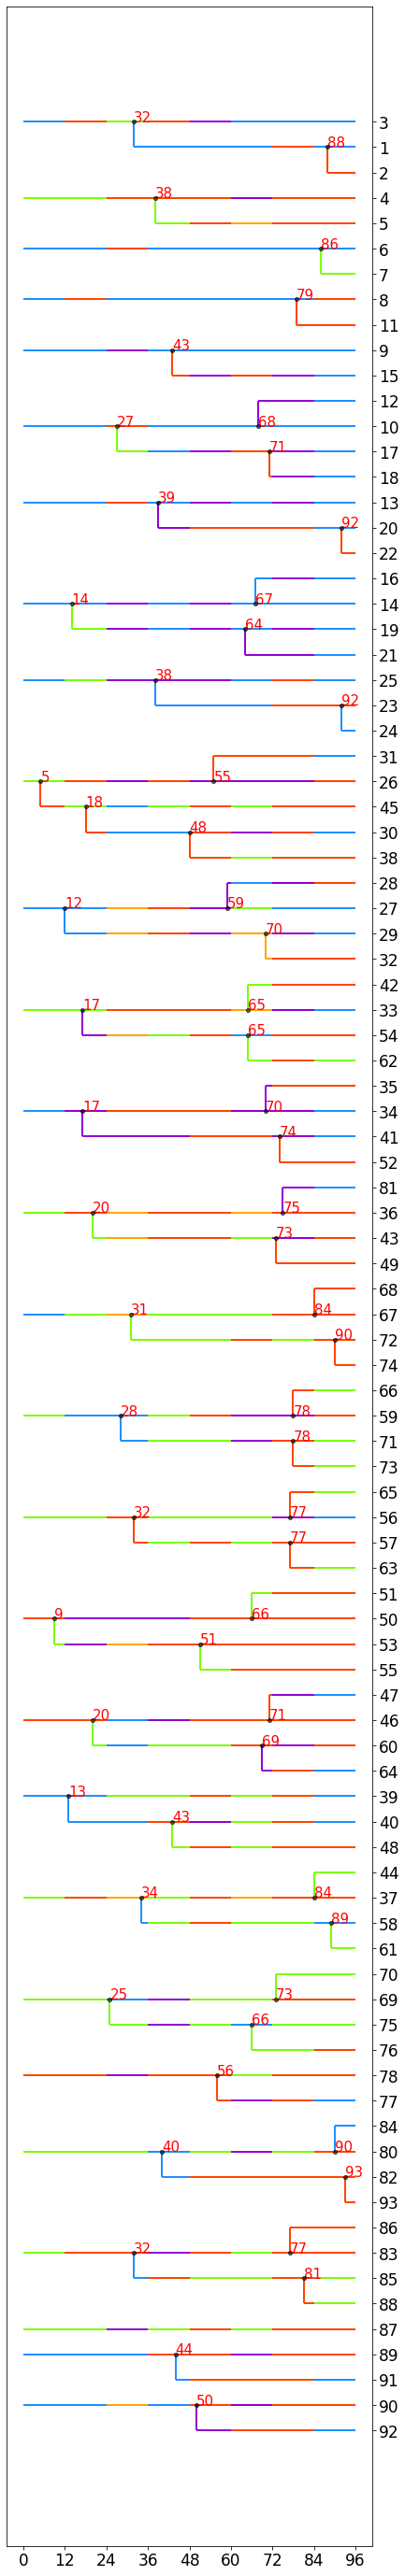

In [ ]:
from matplotlib.collections import LineCollection
from matplotlib.pyplot import savefig

clu = df_cluster1
clu1 = clu.set_index(['End_slice'])
clu2 = clu.sort_values(by=['Cell','End_slice']).set_index(['Cell'])
clu3 = clu.set_index(['End_slice','Cell'])
co=[]
co_vertical=[]
cluxx=[]
clu_point=[]
clu_point_x=[]
up=[]
ver=[]
m1 = DM_manual['Track_mo'].values
n1 = DM_manual['Track_dt'].values
nu = DM_manual['Track_dt'].unique()

## Order of horizontal lines
seq=[]
for j,k in enumerate(DM_manual['Track_mo'].values):
  if j < 64:
    if DM_manual.loc[[j],'Track_mo'].values == DM_manual.loc[[j+1],'Track_mo'].values:
      up.append(int(DM_manual.loc[[j],'Track_dt'].values))
    if DM_manual.loc[[j],'Group'].values==DM_manual.loc[[j+1],'Group'].values:
      if DM_manual.loc[[j],'Track_mo'].values == DM_manual.loc[[j+1],'Track_mo'].values:
        seq.append(int(DM_manual.loc[[j],'Track_dt'].values))
        seq.append(k)
        continue
    seq.append(k)
    seq.append(int(DM_manual.loc[[j],'Track_dt'].values))
    continue
  seq.append(k)
  seq.append(int(DM_manual.loc[[j],'Track_dt'].values))
from itertools import groupby
seq1=[x[0] for x in groupby(seq)]
seq1.remove(79)    # Cell #79 appears in slice97 and is not in the drawing range.

## Conbination of lines
for b, a in enumerate(seq1):  
    color1 = clu2.loc[[a],'Color'].values
    co = np.hstack((co,color1))
    clu_x=[]

    ## Conbination of horizontal lines
    for e in clu2.loc[[a],'End_slice'].unique():
      clu_x.append([e,b])
    clu_x3=copy.deepcopy(clu_x)
    clu_x3[0:0] = [(clu_x3[0][0]-12,b)]
    if a in clu1.loc[(12),'Cell'].unique() and a != 45 and a !=53 and a !=40:   # If "a" belong to first generation cell.
         # The observation window is 12, and the cells appearing within 12 time slices were first-generation cells except for cells #45 (generated by slice5). [#53,#40 with Guss noise].
      clu_x[0:0] = [(clu_x[0][0]-12,b)]
    if a not in clu1.loc[(12),'Cell'].unique() or a == 45 or a == 53 or a==40:
      clu_x[0:0] = [(int(DM_manual[DM_manual['Track_dt']==a]['Slice'].values),b)]
    clu_x1=copy.deepcopy(clu_x)    
    clu_x2=copy.deepcopy(clu_x)
    del(clu_x1[0])
    clu_x2.pop()
    tuple1=zip(clu_x2,clu_x1)
    clu_3=[]
    for r in tuple1:
      clu_3.append(r)
    cluxx.extend(clu_3)
    
    ## Conbination of vertical lines
    if a not in clu1.loc[(12),'Cell'].unique() or a == 45 or a==53 or a==40:
      clu_point_x.append(clu_x[0][0])
      co_vertical = np.append(co_vertical,clu3.loc[(clu_x3[0][0]+12,a),'Color'])
      if a not in up:
          ver.append([clu_x[0][0],b])
          ver.append([clu_x[0][0],b-1])
          clu_point.append(b-1)
      if a in up:
          ver.append([clu_x[0][0],b])
          ver.append([clu_x[0][0],b+1])
          clu_point.append(b+1)
    b+=1
l = [[i]+[j] for i, j in zip(ver[::2], ver[1::2])]
cluxx.extend(l)
co=np.append(co,co_vertical)

# lc = LineCollection(cluxx, linewidth=2)  #### This line show the result without clustering ####
lc = LineCollection(cluxx, colors = co, linewidth=2) 
fig = plt.figure(figsize=(7,50))
plt.xticks(fontsize=17)
plt.yticks(range(92), seq1, fontsize=17)
plt.scatter(clu_point_x, clu_point, s=17, color= 'black', alpha=0.6 ,zorder=100)
for q in range(len(clu_point_x)):
  plt.text(clu_point_x[q], clu_point[q], clu_point_x[q], fontsize=15, color = "red", alpha=1)
plt.gca().invert_yaxis()
ax1 = fig.add_subplot(1, 1, 1)
ax1.add_collection(lc)
ax1.autoscale(enable=True, axis='both', tight=False) 
ax1.xaxis.set_major_locator(MultipleLocator(12))
ax1.yaxis.tick_right()
plt.savefig("Division Lineage.tif")
plt.show()